In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_leave_diseases_dataset_without_augmentation",
    shuffle = True,  #for shuffling,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 55448 files belonging to 39 classes.


In [4]:
len(dataset)            # 1733 batches are created

1733

In [16]:
1733*32

55456

In [5]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [6]:
import os


pathh = "C:/Users/Asus/Desktop/Omdena part-2/Plant_leave_diseases_dataset_without_augmentation"
image_number=[]
disease =[]
for k in class_names:
    full_path = pathh+'/'+k
    lst = os.listdir(full_path) # your directory path
    #print(lst,"sdffdfv")
    number_files = len(lst)
    image_number.append(number_files)
    disease.append(k)
    print(number_files," images in",k,"floder")


#print(i,"it is i")
    

630  images in Apple___Apple_scab floder
621  images in Apple___Black_rot floder
275  images in Apple___Cedar_apple_rust floder
1645  images in Apple___healthy floder
1143  images in Background_without_leaves floder
1502  images in Blueberry___healthy floder
1052  images in Cherry___Powdery_mildew floder
854  images in Cherry___healthy floder
513  images in Corn___Cercospora_leaf_spot Gray_leaf_spot floder
1192  images in Corn___Common_rust floder
985  images in Corn___Northern_Leaf_Blight floder
1162  images in Corn___healthy floder
1180  images in Grape___Black_rot floder
1383  images in Grape___Esca_(Black_Measles) floder
1076  images in Grape___Leaf_blight_(Isariopsis_Leaf_Spot) floder
423  images in Grape___healthy floder
5507  images in Orange___Haunglongbing_(Citrus_greening) floder
2297  images in Peach___Bacterial_spot floder
360  images in Peach___healthy floder
997  images in Pepper,_bell___Bacterial_spot floder
1478  images in Pepper,_bell___healthy floder
1000  images in P

In [7]:
#print(disease)
#print(image_number)

In [8]:
import pandas as pd
df = pd.DataFrame(list(zip(image_number,disease)),columns=['img_size','diseasee'])
#df

In [15]:
#df.head(5)

<AxesSubplot:xlabel='diseasee'>

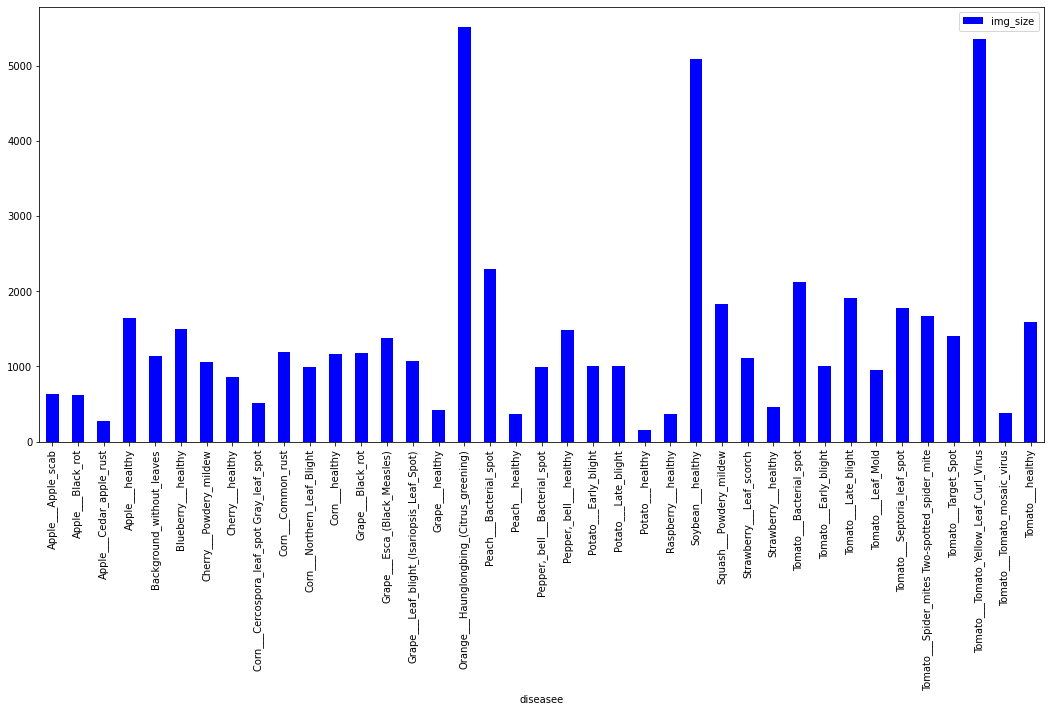

In [10]:
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt
  

# plotting Height
#ax = df.plot(kind="bar",figsize=(15,8))
# plotting age on the same axis
df.plot(x="diseasee", y="img_size", kind="bar", color="blue",figsize=(18,8))

### since the no of images are not some in every folder, so we use data augmentation to make it same, but before that we need to split this dataset between train and test to avoid overfitting, then after spliting we'll perform augmentation on train part.

In [11]:
dataset.take(1)        # 1st batch

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
for image_batch,label_batch in dataset.take(1):       # taking 1st batch
    print(image_batch.shape)   #shape of that batch
    print(label_batch)  # which label of that image is 
    #print(label_batch.name)

(32, 256, 256, 3)
tf.Tensor(
[20 16 16 35 16  9 20 33 26 30  5 19 12 36 29 20 38  3 34 36  5 25 31 14
 31 13 38 25 16 20  3 33], shape=(32,), dtype=int32)


### (32, 256, 256, 3) in that
#### 32 is batch size a
#### 256,256 - image size
#### 3 -  RGB 

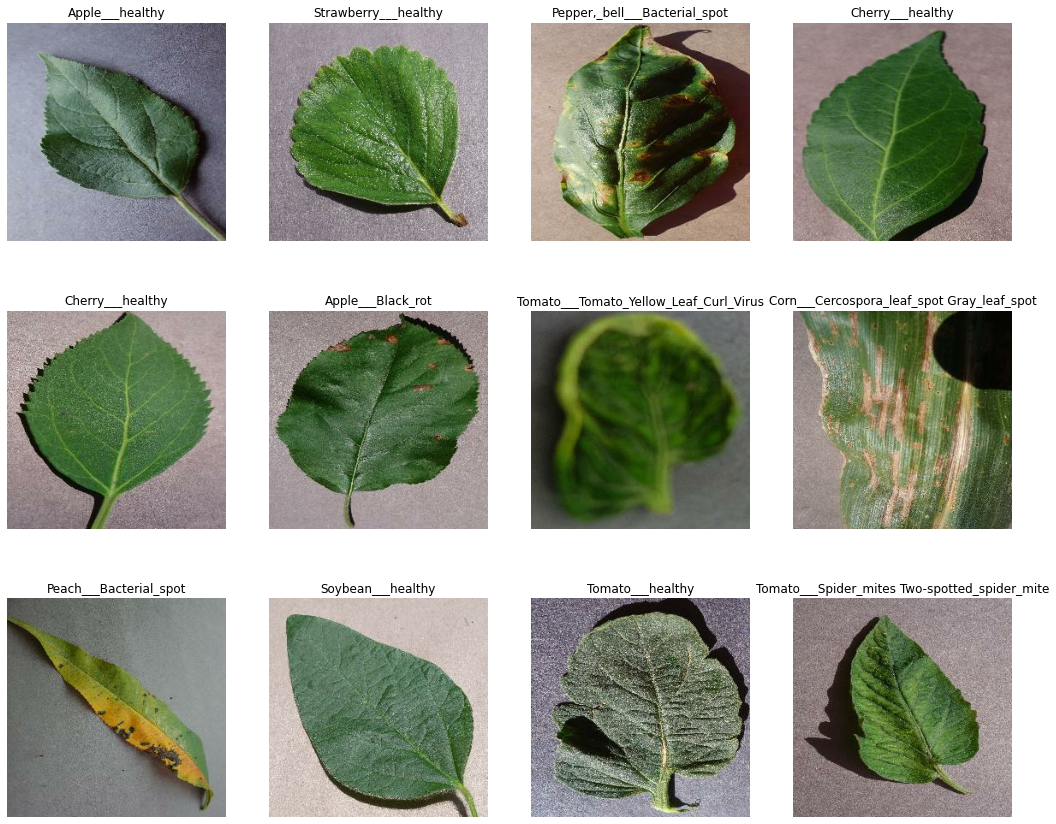

In [14]:
plt.figure(figsize=(18,15))
for image_bathc,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_bathc[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")